## Cargar Datos

Cargar el archivo `datos_inmuebles.csv` en un DataFrame de pandas para comenzar el análisis.


In [12]:
import pandas as pd
df_inmobiliaria = pd.read_csv('/content/datos_inmuebles.csv')
print("Archivo 'datos_inmuebles.csv' cargado exitosamente en df_inmobiliaria.")
df_inmobiliaria.head()

Archivo 'datos_inmuebles.csv' cargado exitosamente en df_inmobiliaria.


,metros_cuadrados,precio_vivienda
0,143.64,225371.45
1,287.68,645567.68
2,233.00,525822.63
3,199.66,412820.32
4,89.00,156873.57


## Preparar Datos para Regresión

Identificar la variable dependiente (precio_vivienda) y la variable independiente (metros_cuadrados), y añadir una constante a la variable independiente, esencial para el cálculo del intercepto en el modelo OLS.


In [16]:
import statsmodels.api as sm

# Definir la variable independiente (X) y dependiente (y)
X = df_inmobiliaria['metros_cuadrados']
y = df_inmobiliaria['precio_vivienda']

# Añadir una constante (intercepto) a la variable independiente para el cálculo del intercepto
X_con_constante = sm.add_constant(X)

print("Variables dependiente e independiente definidas, y constante añadida a X.")
print("Primeras 5 filas de X_con_constante:")
print(X_con_constante.head())

Variables dependiente e independiente definidas, y constante añadida a X.
Primeras 5 filas de X_con_constante:
   const  metros_cuadrados
0    1.0            143.64
1    1.0            287.68
2    1.0            233.00
3    1.0            199.66
4    1.0             89.00


## Realizar Regresión Lineal con OLS


Aplicar el método de Mínimos Cuadrados Ordinarios (OLS) para calcular la pendiente (coeficiente de metros_cuadrados) y el intercepto del modelo de regresión lineal. Se explicará didácticamente qué es OLS y cómo se usa para encontrar la 'mejor' línea.


In [14]:
modelo_ols = sm.OLS(y, X_con_constante).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_vivienda   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1132.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           1.22e-55
Time:                        10:10:02   Log-Likelihood:                -1212.5
No. Observations:                 100   AIC:                             2429.
Df Residuals:                      98   BIC:                             2434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6415.0857   1.12e+04  

El coeficiente de determinación **R² (R-squared)** del modelo es **0.920**, lo que significa que el 92% de la variabilidad en el precio de las viviendas (`precio_vivienda`) puede ser explicada por la variable independiente `metros_cuadrados`. Este valor indica un ajuste muy bueno del modelo, sugiriendo que el tamaño de la vivienda es un predictor fuerte del precio en este conjunto de datos.

### Interpretación de la Pendiente y el Intercepto:

*   **Pendiente (`metros_cuadrados` - `coef`): 2050.3023**
    *   Este valor representa la **pendiente** de la línea de regresión. Didácticamente, significa que, por cada metro cuadrado adicional que tenga una propiedad, se espera que el precio de la vivienda aumente en aproximadamente **2050.30 unidades monetarias**, manteniendo todo lo demás constante. Es decir, a mayor superficie, mayor será el precio de venta.

*   **Intercepto (`const` - `coef`): 6415.0857**
    *   Este valor es el **intercepto** (o constante) de la línea de regresión. Teóricamente, representa el precio estimado de una vivienda con 0 metros cuadrados. En el contexto inmobiliario, un intercepto de **6415.09 unidades monetarias** por sí solo no tiene una interpretación práctica directa, ya que una vivienda no puede tener 0 metros cuadrados y seguir siendo una vivienda. Sin embargo, matemáticamente es el punto donde la línea de regresión cruza el eje Y. A menudo, en modelos predictivos como este, el intercepto sirve más como un ajuste base para el modelo que como un valor con significado inherente en el mundo real, especialmente cuando el rango de la variable independiente no incluye el cero.

## Visualizar Datos y Línea de Regresión

Crear un gráfico de dispersión de los datos de metros cuadrados vs. precio de la vivienda y superponer la línea de regresión calculada, con etiquetas y leyendas claras para una comprensión visual.


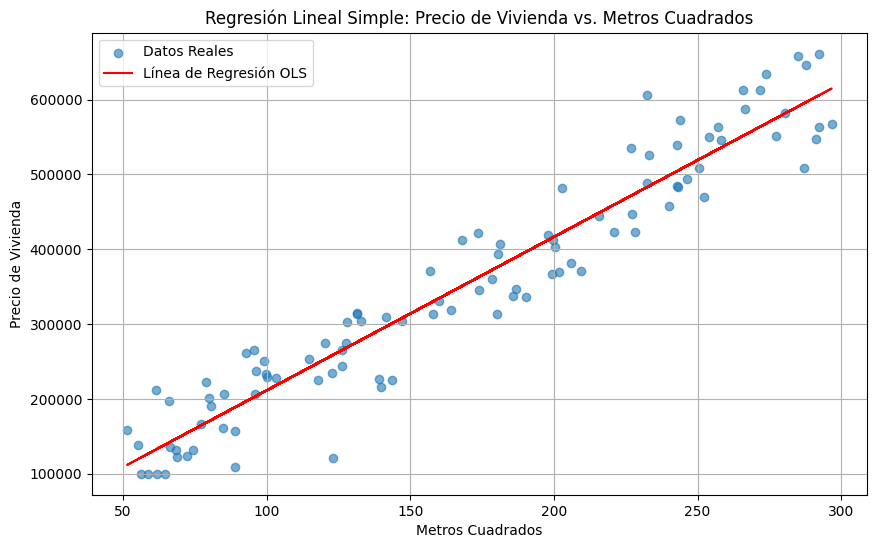

In [15]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión de los datos reales
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datos Reales', alpha=0.6)

# Superponer la línea de regresión
# Se usan los valores predichos por el modelo para dibujar la línea
plt.plot(X, modelo_ols.predict(X_con_constante), color='red', label='Línea de Regresión OLS')

# Añadir etiquetas y título
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio de Vivienda')
plt.title('Regresión Lineal Simple: Precio de Vivienda vs. Metros Cuadrados')

# Añadir leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


## Resumen Final




Proporcionar un resumen didáctico de todo el proceso de regresión lineal simple, destacando los resultados clave y su interpretación.


## Conclusiones:

### Q&A

1.  **¿Cuál es la calidad del ajuste del modelo de regresión lineal simple?**
    El coeficiente de determinación R² del modelo es 0.920. Esto significa que el 92% de la variabilidad en el precio de las viviendas puede ser explicada por la variable `metros_cuadrados`, indicando un ajuste muy bueno del modelo a los datos.

2.  **¿Cuál es el significado de la pendiente (`pendiente`) en el contexto inmobiliario?**
    La pendiente es 2050.3023. Didácticamente, esto implica que por cada metro cuadrado adicional que tenga una propiedad, se espera que el precio de la vivienda aumente en aproximadamente 2050.30 unidades monetarias, manteniendo otros factores constantes.

3.  **¿Cuál es el significado del intercepto (`intercepto`) en el contexto inmobiliario?**
    El intercepto es 6415.0857. Teóricamente, representa el precio estimado de una vivienda con 0 metros cuadrados. En el contexto inmobiliario, este valor no tiene una interpretación práctica directa ya que una vivienda no puede tener 0 metros cuadrados. Sirve más como un ajuste base matemático para el modelo.

### Data Analysis Key Findings

*   El archivo `datos_inmuebles.csv` fue cargado exitosamente, revelando variables clave como `metros_cuadrados` y `precio_vivienda`.
*   La regresión lineal simple, utilizando `metros_cuadrados` como variable independiente y `precio_vivienda` como dependiente, resultó en un modelo con un coeficiente de determinación R² de **0.920**.
*   El coeficiente de la pendiente para `metros_cuadrados` es de **2050.3023**, lo que sugiere un aumento de 2050.30 unidades monetarias en el precio de la vivienda por cada metro cuadrado adicional.
*   El intercepto del modelo es **6415.0857**, un valor que carece de interpretación práctica directa en el contexto inmobiliario real.
*   La visualización del gráfico de dispersión con la línea de regresión superpuesta confirma visualmente el fuerte ajuste lineal entre los metros cuadrados y el precio de la vivienda.

### Insights or Next Steps

*   El modelo de regresión lineal simple muestra un excelente poder predictivo para el precio de la vivienda basado únicamente en los metros cuadrados, lo que podría ser un punto de partida para una valoración inmobiliaria rápida.
*   Para mejorar la robustez y precisión del modelo, se podría considerar la inclusión de otras variables relevantes como el número de habitaciones, baños, antigüedad de la propiedad, ubicación, o características de lujo, realizando un análisis de regresión múltiple.
